In [2]:
suppressPackageStartupMessages(library(plyr))
suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library(tidyr))
suppressPackageStartupMessages(library(tibble))
suppressPackageStartupMessages(library(ggplot2))
library(parallel)
library(ggpubr)
library(rstatix)
library(parallel)
library(ggpubr)
library(anndata)
library(ggsci)
library(ggrepel)
library(patchwork)


# LMM result

In [9]:
file_list<-list.files(path ='/home//jupyter/BRI_Analysis/scRNA/Analysis-Longitudinal_Baselines/04B_LMM_Ages/', pattern = ".csv", all.files = FALSE,
           full.names = TRUE, recursive = FALSE,
           ignore.case = FALSE, include.dirs = TRUE, no.. = FALSE)

In [13]:
LMM_list<-mclapply(file_list,read.csv,mc.cores=length(file_list))
LMM_res<-do.call(rbind,LMM_list) %>%
  filter(factor == 'Ages') %>%
  group_by(celltype) %>%
  mutate(padj = p.adjust(`Pr...t..`, method = 'BH')) 
LMM_res$p.normal<-LMM_res$`Pr...t..`

In [15]:
LMM_res$Estimate<-as.numeric(LMM_res$Estimate)

In [17]:
LMM_res %>% filter(Gene=='TSHZ2')

X,Estimate,Std..Error,t.value,Pr...t..,Gene,celltype,factor,padj,p.normal
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>
10,0.004981126,0.0007166060,6.950998,6.059336e-10,TSHZ2,Core naive CD4 T cell,Ages,5.084790e-08,6.059336e-10
106,0.001169468,0.0003571945,3.274035,1.516639e-03,TSHZ2,GZMB- CD27- EM CD4 T cell,Ages,4.144647e-03,1.516639e-03
226,0.003129058,0.0013977623,2.238619,2.770339e-02,TSHZ2,ISG+ naive CD4 T cell,Ages,3.722733e-02,2.770339e-02


In [18]:
Plot_list<-list()
for (i in 1:length(unique(LMM_res$celltype))){

data <- LMM_res %>% filter(celltype==unique(LMM_res$celltype)[i])%>% mutate(Expression = case_when(Estimate >0 & padj <=  0.05 ~ "Up-regulated_along_ages",
                                                     Estimate < 0 & padj <=  0.05 ~ "Down-regulated_along_ages",
                                                     TRUE ~ "Unchanged"))
top <- 20
top_genes <- bind_rows(
  data %>% 
    filter(Expression == 'Up-regulated_along_ages') %>% 
    arrange(padj, desc(abs(Estimate))) %>% 
    head(top),
  data %>% 
    filter(Expression == 'Down-regulated_along_ages') %>% 
    arrange(padj, desc(abs(Estimate))) %>% 
    head(top)
)
    
Plot_list[[unique(LMM_res$celltype)[i]]]<-ggplot(data, aes(Estimate, -log(padj,10))) +
  geom_point(aes(color = Expression), size =0.1) +
  xlab(expression("Estimate")) + 
  ylab(expression("-log"[10]*"FDR")) +
  scale_color_manual(values = c("Down-regulated_along_ages"="dodgerblue3", "Unchanged"="gray50", "Up-regulated_along_ages"="firebrick3")) +
  guides(colour = guide_legend(override.aes = list(size=8))) +
  geom_text_repel(data = top_genes,box.padding = 0.5,force= 0.5,max.overlaps=15,

                   mapping = aes(Estimate, -log(padj,10), label = Gene),
                   size = 3)+ ggtitle(unique(LMM_res$celltype)[i])+theme_bw(base_size=11)

}

Warning message:
“ggrepel: 28 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 40 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 40 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 20 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 22 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 40 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 40 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 31 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 38 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 39 unlabel

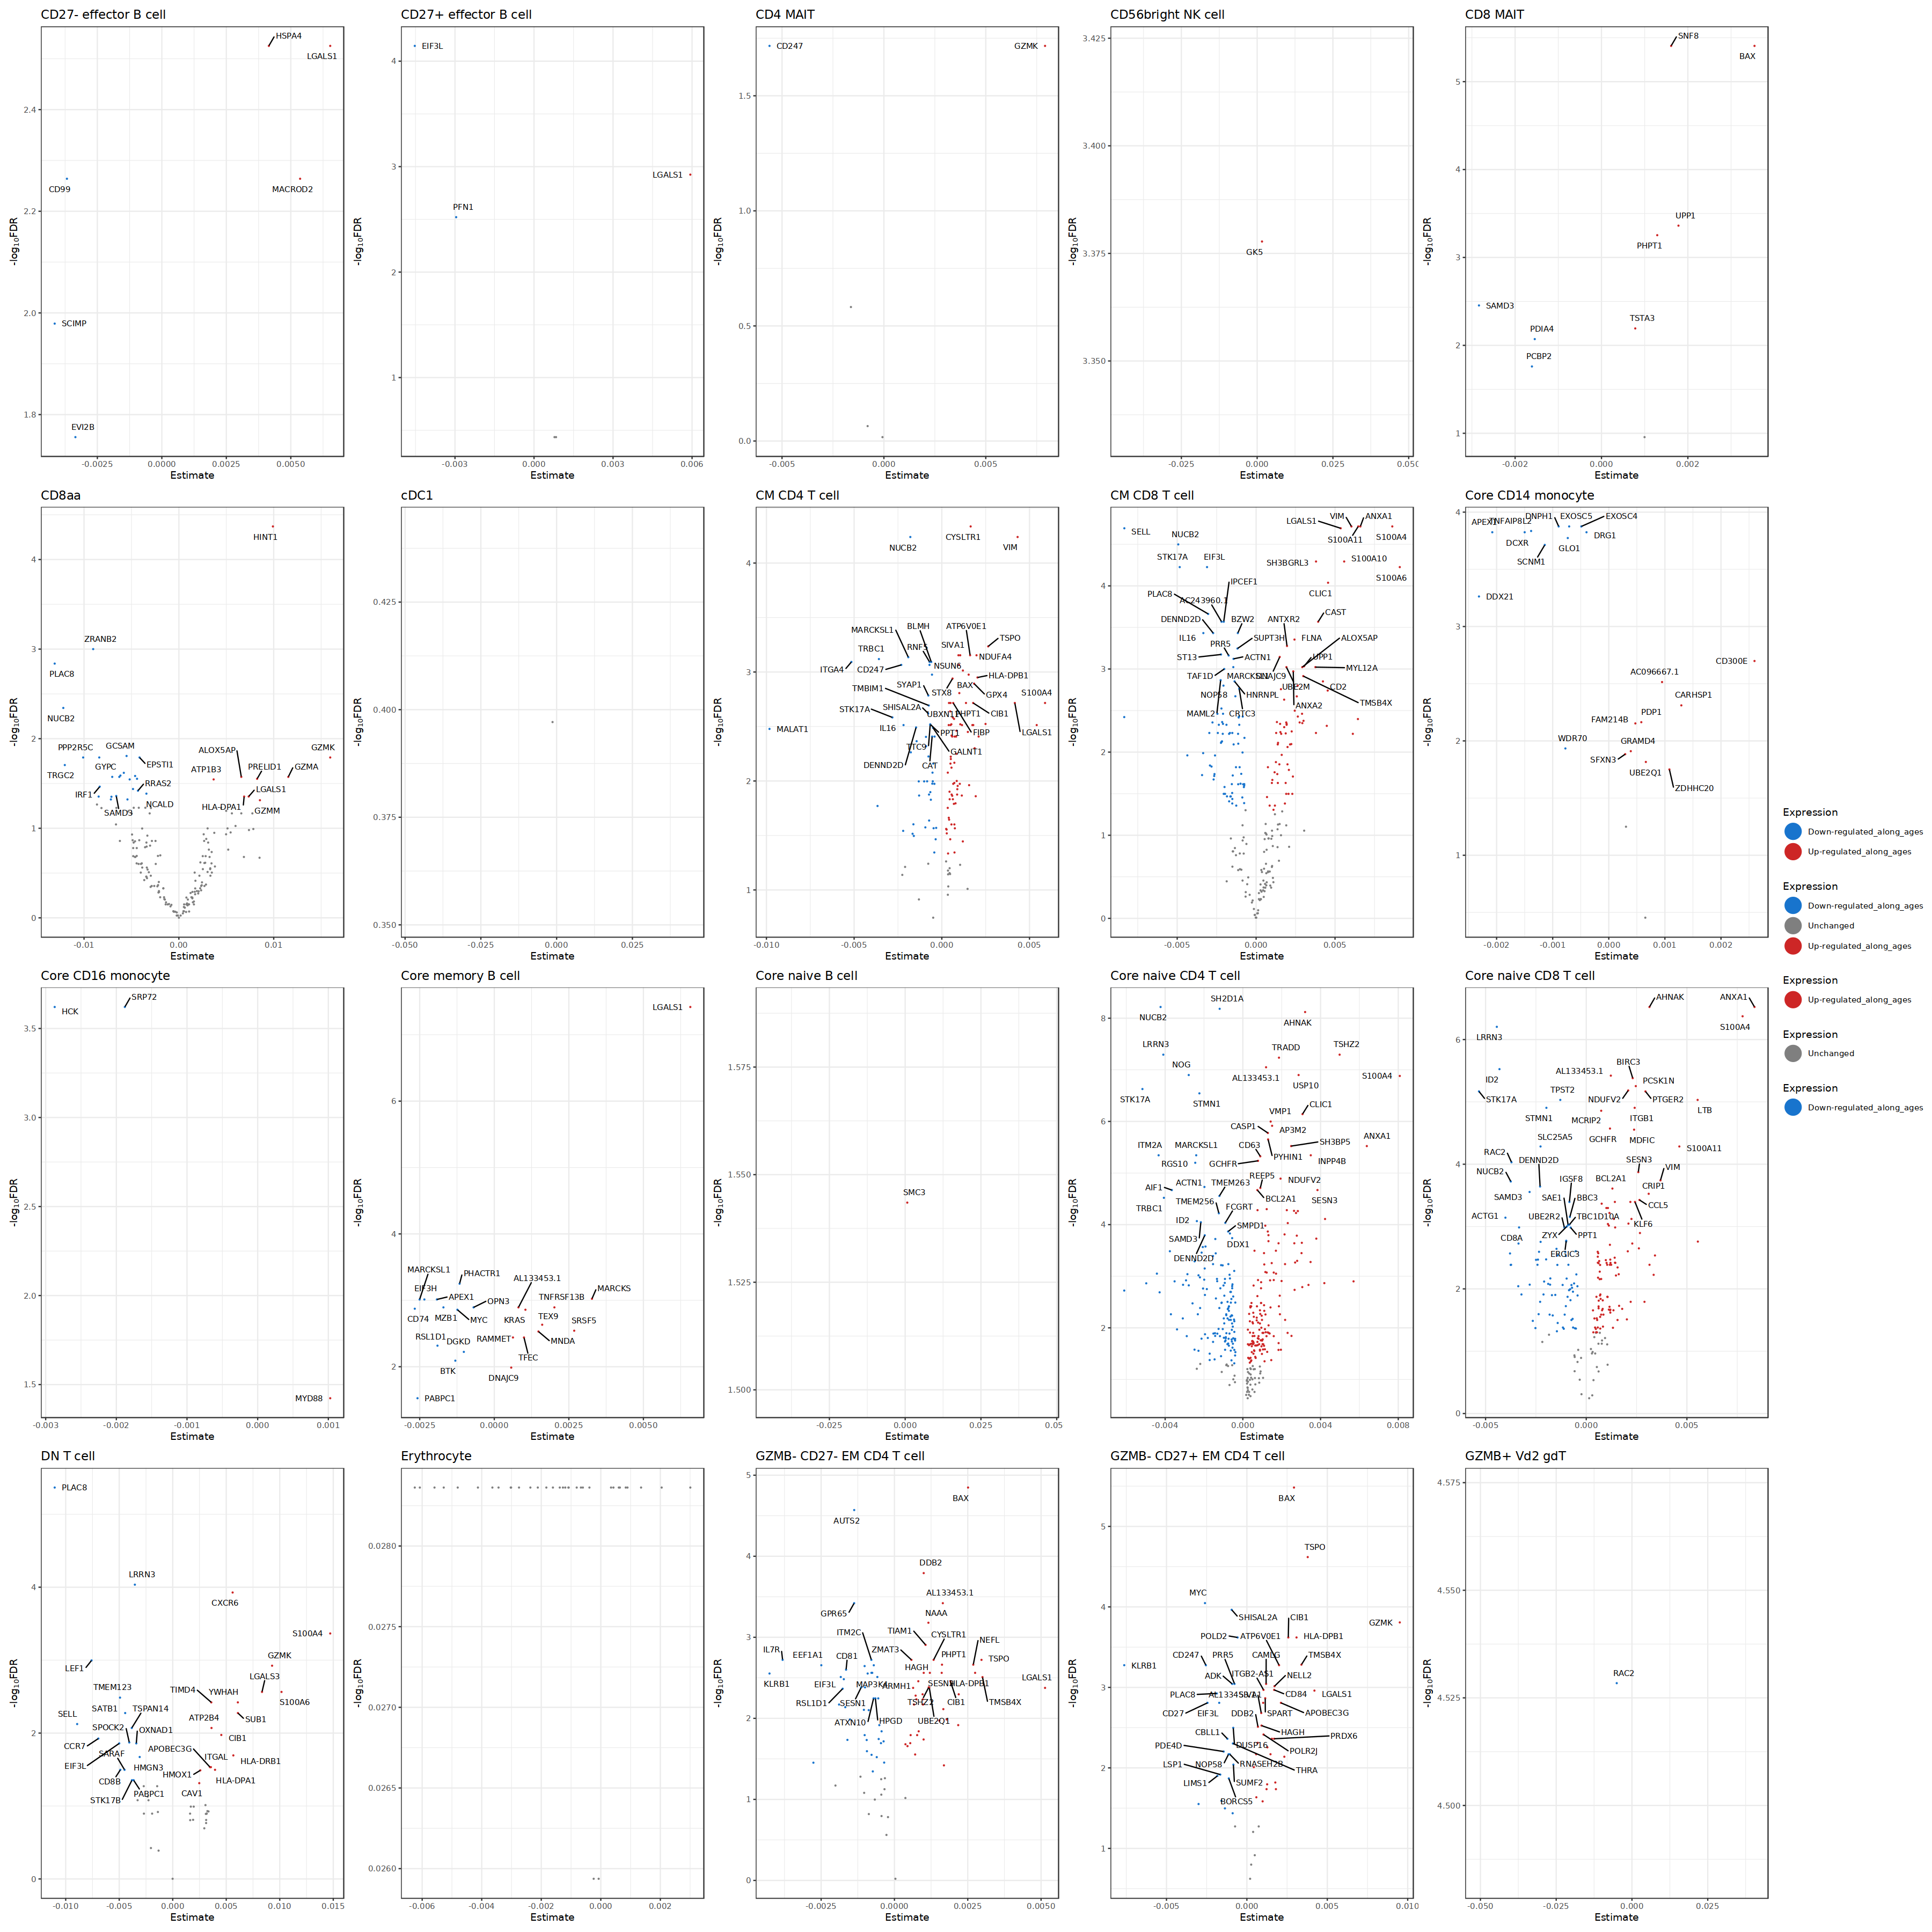

In [19]:
options(repr.plot.width = 30, repr.plot.height = 30)

wrap_plots(Plot_list[1:20],ncol=5)+ plot_layout(guides = "collect")

Warning message:
“ggrepel: 10 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 40 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 38 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 9 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 40 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 14 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


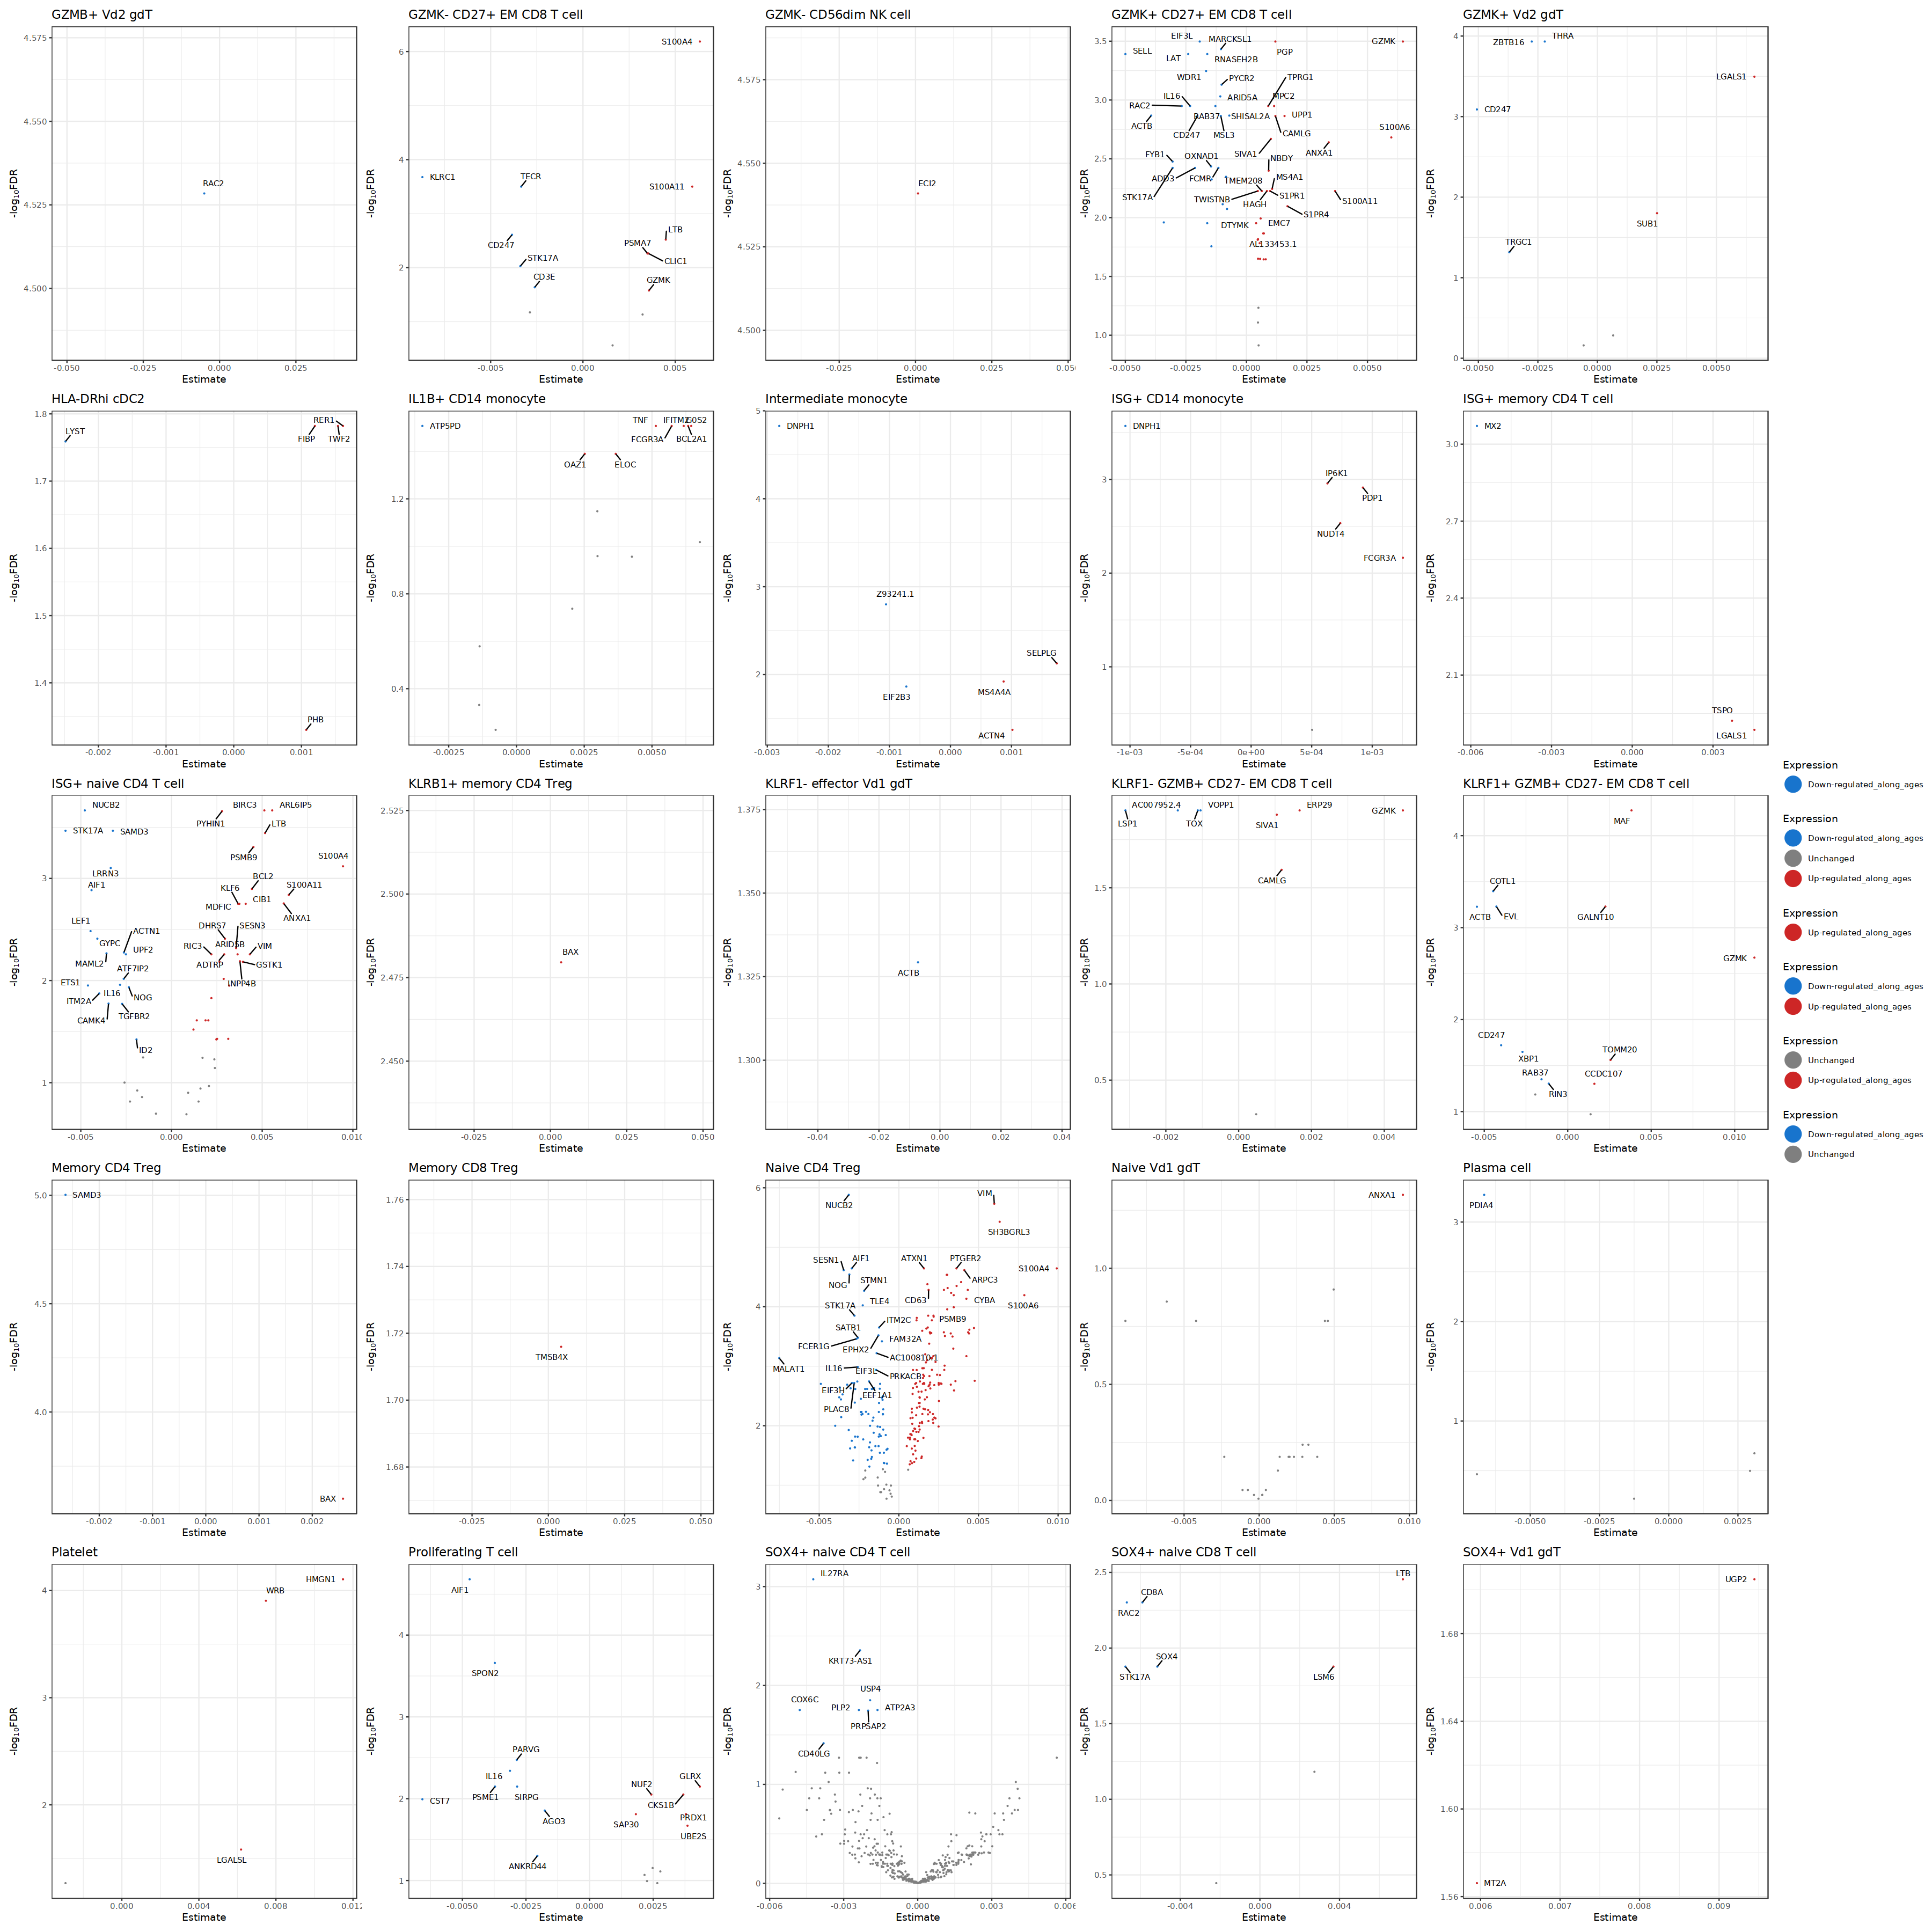

In [20]:
options(repr.plot.width = 30, repr.plot.height = 30)

wrap_plots(Plot_list[20:length(Plot_list)],ncol=5)+ plot_layout(guides = "collect")

In [40]:
file_list<-list.files(path ='/home//jupyter/BRI_Analysis/scRNA/Analysis-Cross-Sectional/02B_DESeq2_BR1_VS_BR2_L3', pattern = ".csv", all.files = FALSE,
           full.names = TRUE, recursive = FALSE,
           ignore.case = FALSE, include.dirs = TRUE, no.. = FALSE)

In [41]:
DEG_list<-mclapply(file_list,read.csv,mc.cores=length(file_list))

DEG<-do.call(rbind,DEG_list)


In [42]:
DEG<- DEG%>% mutate(Expression = case_when(log2FoldChange >=0.1 & padj <=  0.05 ~ "Up-regulated-BR1",
                                                     log2FoldChange <= -0.1 & padj <= 0.05 ~ "Down-regulated-BR1",
                                                     TRUE ~ "Unchanged"))

In [43]:
DEG_filtered<-DEG %>% filter(!Expression=='Unchanged')

In [ ]:
meta_data_nonD7<-meta_data  %>% filter(!sample.visitName %in% c('Flu Year 1 Day 7','Flu Year 2 Day 7'))

In [47]:
colnames(DEG_filtered)[1]<-'Gene'

In [49]:
DEG_filtered<-left_join(DEG_filtered,LMM_res,by=c('Gene','celltype'))

In [66]:
selected_celltype<-names(table(DEG_filtered$celltype)[table(DEG_filtered$celltype)>50])

`geom_smooth()` using formula = 'y ~ x'


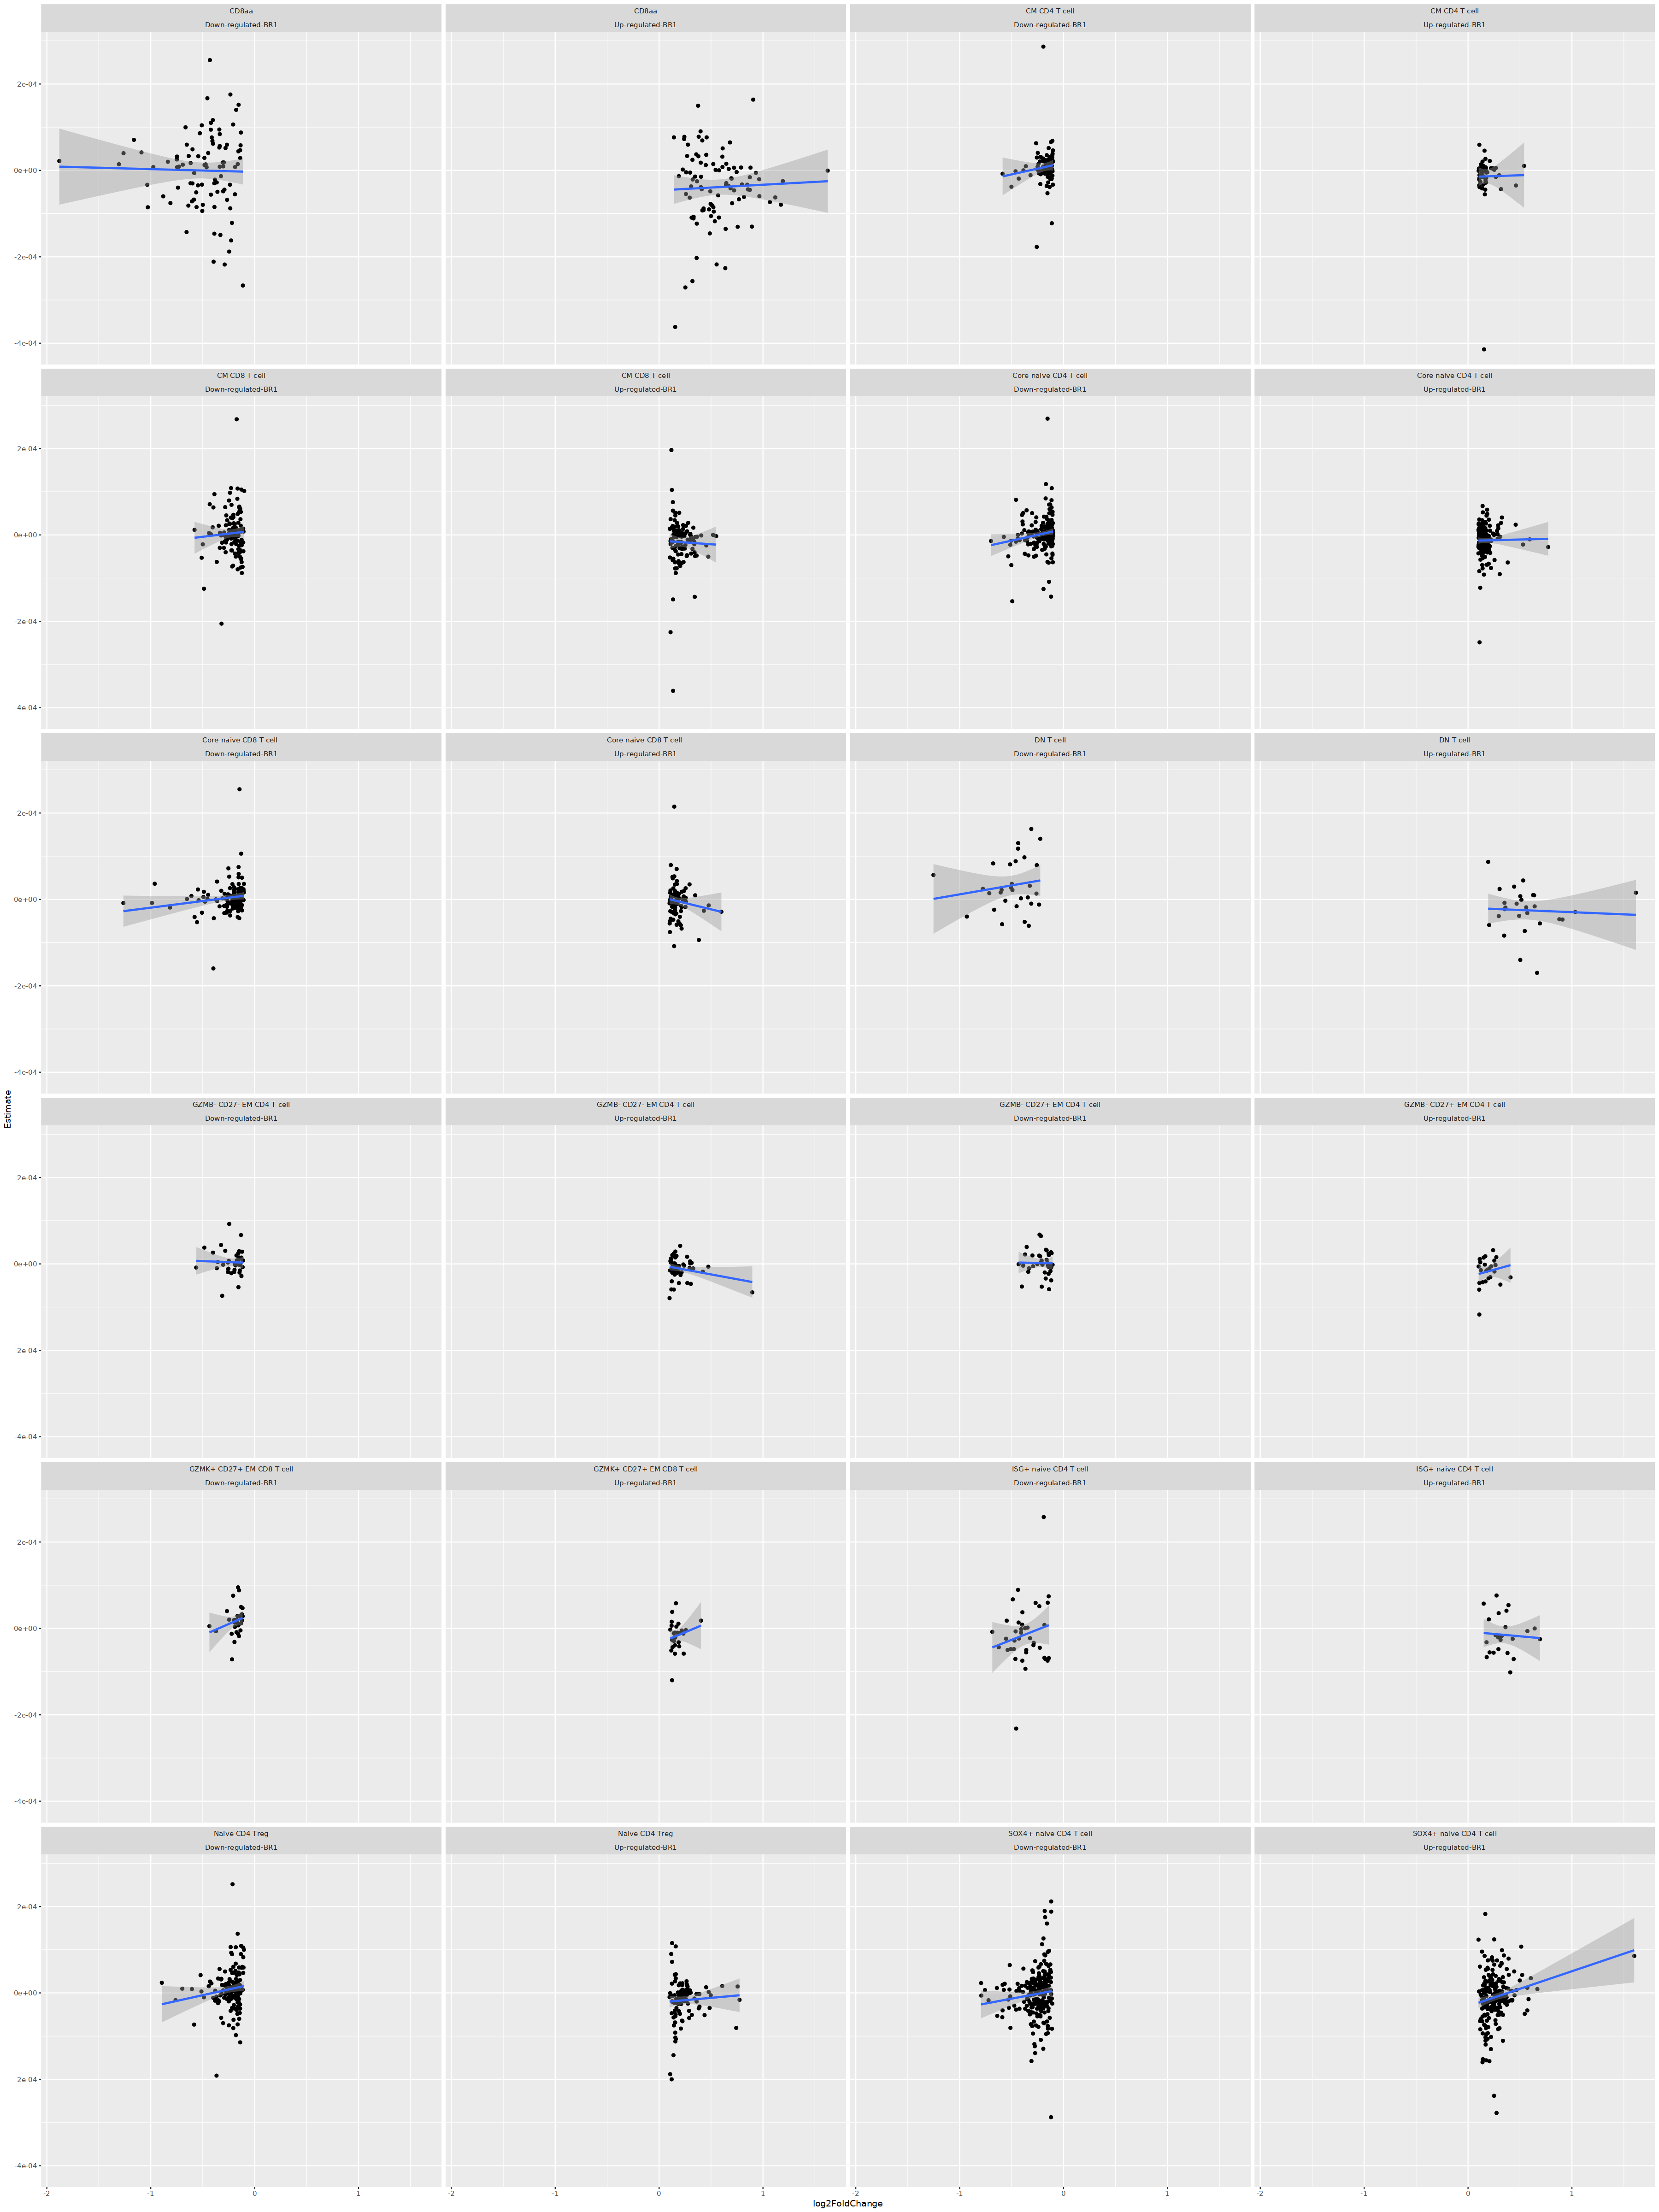

In [72]:
options(repr.plot.width = 30, repr.plot.height = 40)

ggplot(data = DEG_filtered %>% filter(celltype %in% selected_celltype), aes(x = log2FoldChange, y =Estimate )) + 
  geom_point() +
  geom_smooth(method = "lm", se = TRUE)+facet_wrap(~celltype+Expression, ncol=4)